# Snippets

In [1]:
import numpy as np
from scipy.linalg import eigh
from scipy.spatial.distance import squareform, pdist

import pandas as pd
from matplotlib.pyplot import plot, scatter
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, v_measure_score, normalized_mutual_info_score


In [51]:
n = 60
d = 2
#n_clusters = 3
#centers = np.array([[1, 1], [-1, -1], [2, -2]]) + 10
n_clusters = 2
centers = np.array([[3, 3], [-3, -3]]) + 10
X, y = make_blobs(n_samples=n, n_features=d,
                centers=centers, cluster_std=0.4,
                shuffle=True, random_state=0)
df = pd.DataFrame(X, columns=[f'x{x}' for x in range(d)])
X_df = df.copy()
Xy_df = df.copy()
Xy_df['y'] = y
Xy_df

,x0,x1,y
0,6.731016,6.856179,1
1,13.613112,13.587744,0
2,12.860835,13.062540,0
3,7.455760,6.506070,1
4,13.304415,13.048670,0
5,6.637081,7.020778,1
6,6.347921,7.185113,1
7,13.061979,13.151265,0
8,7.245632,7.368883,1
9,6.834552,6.701018,1


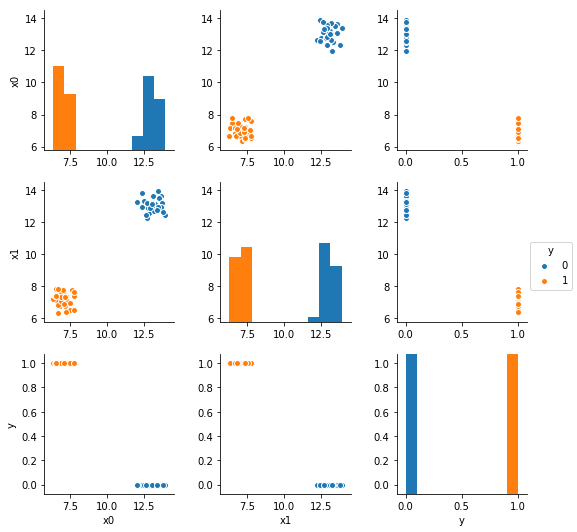

In [52]:
sns.pairplot(Xy_df, hue='y');

## COPAC

In [8]:
from copac import COPAC

In [53]:
eucl_dist = squareform(pdist(X, metric='euclidean'))
eucl_dist.mean(axis=0)
eucl_dist

array([[ 0.        ,  9.62690022,  8.72316456, ...,  0.54130209,
         8.828472  ,  0.34037401],
       [ 9.62690022,  0.        ,  0.91747434, ...,  9.42843266,
         0.92412292,  9.3990036 ],
       [ 8.72316456,  0.91747434,  0.        , ...,  8.51732286,
         0.60360463,  8.50008224],
       ..., 
       [ 0.54130209,  9.42843266,  8.51732286, ...,  0.        ,
         8.65717253,  0.74825625],
       [ 8.828472  ,  0.92412292,  0.60360463, ...,  8.65717253,
         0.        ,  8.58823962],
       [ 0.34037401,  9.3990036 ,  8.50008224, ...,  0.74825625,
         8.58823962,  0.        ]])

[0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0]
[1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1]
AMI 1.0
NMI 1.0
V   1.0


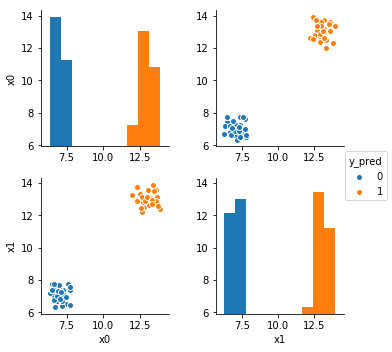

In [58]:
clst = COPAC(k=40, mu=10, eps=2, algorithm='brute')
y_pred = clst.fit_predict(X)
print(y_pred)
print(y)
print('AMI', adjusted_mutual_info_score(y, y_pred))
print('NMI', normalized_mutual_info_score(y, y_pred))
print('V  ', v_measure_score(y, y_pred))
Xy_df['y_pred'] = y_pred
sns.pairplot(Xy_df, x_vars=['x0', 'x1'], y_vars=['x0', 'x1'], hue='y_pred');